## 一、边缘直方图

如果你想要在同一幅图中既展示数据之间的关系，又展示数据的分布，便可以使用marginal histogram(边缘直方图)，它可以在散点图的边缘画出X和Y变量的分布直方图。

<p>seaborn的jointplot可以实现边缘直方图
<p>plotly的easyplot可以实现边缘直方图

### 1、使用seaborn实现边缘直方图

（1）格式

In [1]:
import seaborn as sns
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

（2）举例

<P><STRONG>Example 1:&nbsp;</STRONG>
    最简单的使用

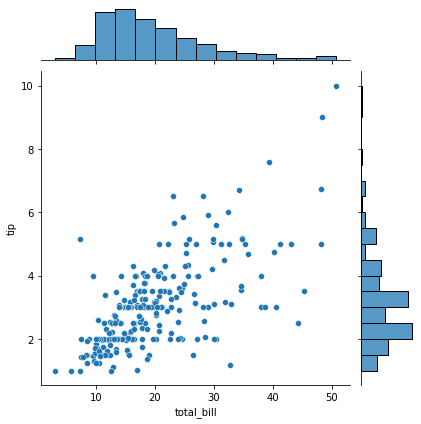

In [2]:
import seaborn as sns
  
# loading tips dataset
tips = sns.load_dataset("tips")
  
# plotting scatterplot with histograms for features total bill and tip.
sns.jointplot(data=tips, x="total_bill", y="tip")

<P><STRONG>Example 2:</STRONG> Using kind=”reg” attribute you can add a linear 
regression fit and univariate KDE curves.

示例2：使用kind=“reg”属性可以添加线性回归拟合和单变量KDE曲线

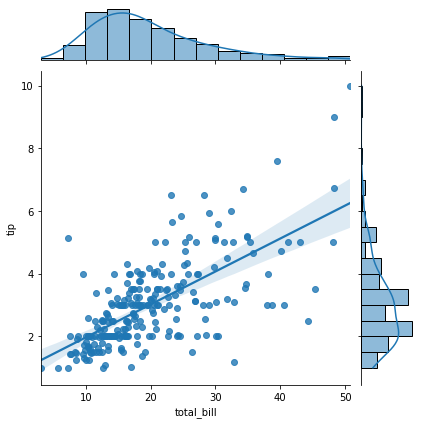

In [3]:
import seaborn as sns
  
tips = sns.load_dataset("tips")
  
# here "*" is used as a marker for scatterplot
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")


kind的其他取值

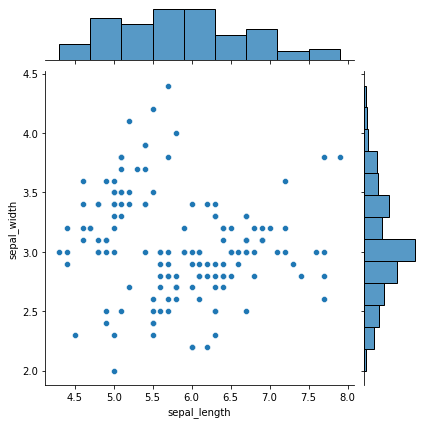

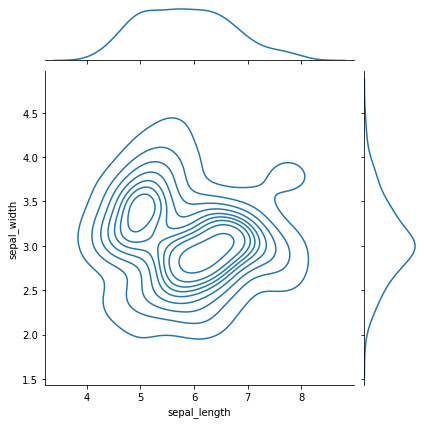

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')
#默认kind="scatter"
#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')

plt.show()

使用marginal_kws修改直方图的样式

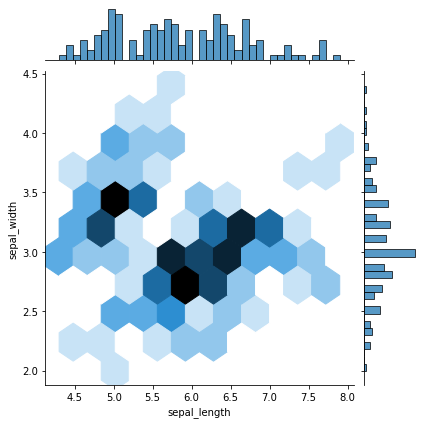

In [5]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# Custom the histogram:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex', marginal_kws=dict(bins=400))

plt.show()


### 2、使用plotly express实现边缘直方图

(1)plotly express简单介绍及安装

Plotly Express 是一个新的高级 Python 可视化库：它是 Plotly.py 的高级封装，它为复杂的图表提供了一个简单的语法。 

受 Seaborn 和 ggplot2 的启发，它专门设计为具有简洁，一致且易于学习的 API ：只需一次导入，您就可以在一个函数调用中创建丰富的交互式绘图，包括分面绘图（faceting）、地图、动画和趋势线。它带有数据集、颜色面板和主题，就像 Plotly.py 一样。

Plotly Express 完全免费：凭借其宽松的开源 MIT 许可证，您可以随意使用它（是的，甚至在商业产品中！）。 

最重要的是，Plotly Express 与 Plotly 生态系统的其他部分完全兼容：在您的 Dash 应用程序中使用它，使用 Orca 将您的数据导出为几乎任何文件格式，或使用JupyterLab 图表编辑器在 GUI 中编辑它们！

用 pip install plotly_express 命令可以安装 Plotly Express。


(2)格式

（2）示例

<strong>exmaple 自行查找资料，实现Plotly Express的边缘直方图</strong>

## 二、边缘箱线图

边缘箱图与边缘直方图具有相似的用途。 然而，箱线图有助于精确定位X和25的中位数，第25和第75百分位数

### 1、使用matplotlib实现边缘箱线图

C:\Users\shili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shili\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\shili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


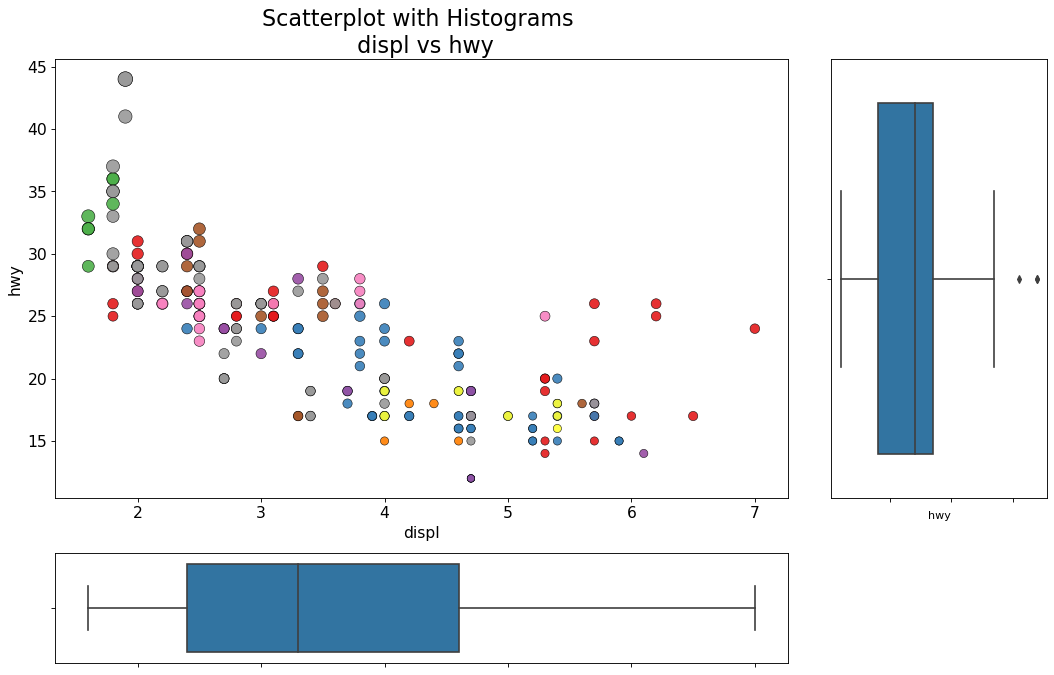

In [7]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("Data\mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()


### 2、使用seaborn实现边缘箱线图

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# https://seaborn.pydata.org/tutorial/distributions.html
# penguins_data="Data\palmer_penguin_species.tsv.txt"
# penguins_df = pd.read_csv(penguins_data, sep="\t")
penguins=sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# # set plot context to set plot sizes 
# sns.set_context("talk", font_scale=1.2)
# plt.figure(figsize=(12,10))
# g = sns.JointGrid(data=penguins_df, 
#                   x="culmen_length_mm",
#                   y="culmen_depth_mm")
# #现在我们可以在JointGrid（）绘图上添加绘图层。
# #这里我们使用Seaborn的plot_joint（）函数来绘制散点图。为此，我们调用Seaborn的scatterplot（）作为plot_joint（）的参数。
# g.plot_joint(sns.scatterplot)

# g.plot_marginals(sns.boxplot)
# #plt.savefig("Scatterplot_with_marginal_boxplot_Seaborn.png",
# #                    format='png',dpi=150)
# plt.show()

In [9]:
import seaborn
seaborn.__version__

'0.11.0'

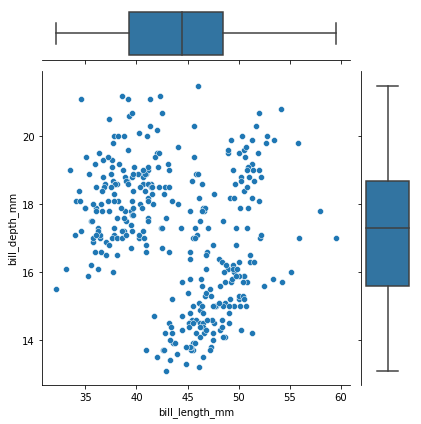

In [11]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)

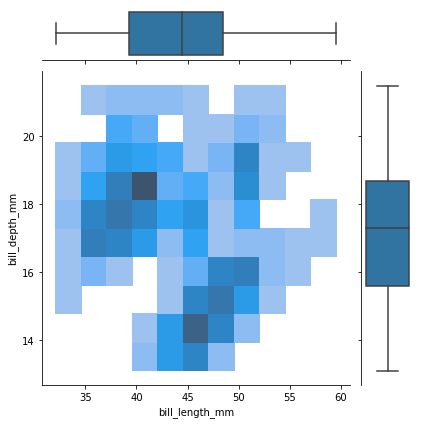

In [12]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)